# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Santiago Silva
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [5]:
import numpy as np
from scipy.interpolate import CubicSpline, CubicHermiteSpline
import matplotlib.pyplot as plt


tiempos = np.array([0, 3, 5, 8, 13])  # segundos
distancias = np.array([0, 225, 383, 623, 993])  # metros
velocidades = np.array([75, 77, 80, 74, 72])  # METROS/Segundos

#hermite
hermite = CubicHermiteSpline(tiempos, distancias, velocidades)

#cubicspline
spline = CubicSpline(tiempos, distancias)

#los puntos para la  evaluación
t_eval = np.linspace(0, 13, 1000)

#calculo de X y V
pos_hermite = hermite(t_eval)
vel_hermite = hermite.derivative()(t_eval)

pos_spline = spline(t_eval)
vel_spline = spline.derivative()(t_eval)

# Evaluar en t = 10 s
t_pred = 10
pos_hermite_10 = hermite(t_pred)
vel_hermite_10 = hermite.derivative()(t_pred)

pos_spline_10 = spline(t_pred)
vel_spline_10 = spline.derivative()(t_pred)

#valores maximos
vel_max_hermite = np.max(vel_hermite)
vel_max_spline = np.max(vel_spline)

print("Polinomio de Hermite:")
print(f"Posición en t = 10s: {pos_hermite_10:.2f} metros")
print(f"Velocidad en t = 10s: {vel_hermite_10:.2f} m/s")
print(f"Velocidad máxima: {vel_max_hermite:.2f} m/s")

print("Spline Cúbico:")
print(f"Posición en t = 10s: {pos_spline_10:.2f} metros")
print(f"Velocidad en t = 10s: {vel_spline_10:.2f} m/s")
print(f"Velocidad máxima: {vel_max_spline:.2f} m/s")


Polinomio de Hermite:
Posición en t = 10s: 771.96 metros
Velocidad en t = 10s: 74.64 m/s
Velocidad máxima: 82.00 m/s
Spline Cúbico:
Posición en t = 10s: 778.42 metros
Velocidad en t = 10s: 75.82 m/s
Velocidad máxima: 80.27 m/s


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

Aceleración gravitacional estimada:
5,000 m: 9.777343 m/s^2
42,000 m: 9.717243 m/s^2
90,000 m: 9.644233 m/s^2


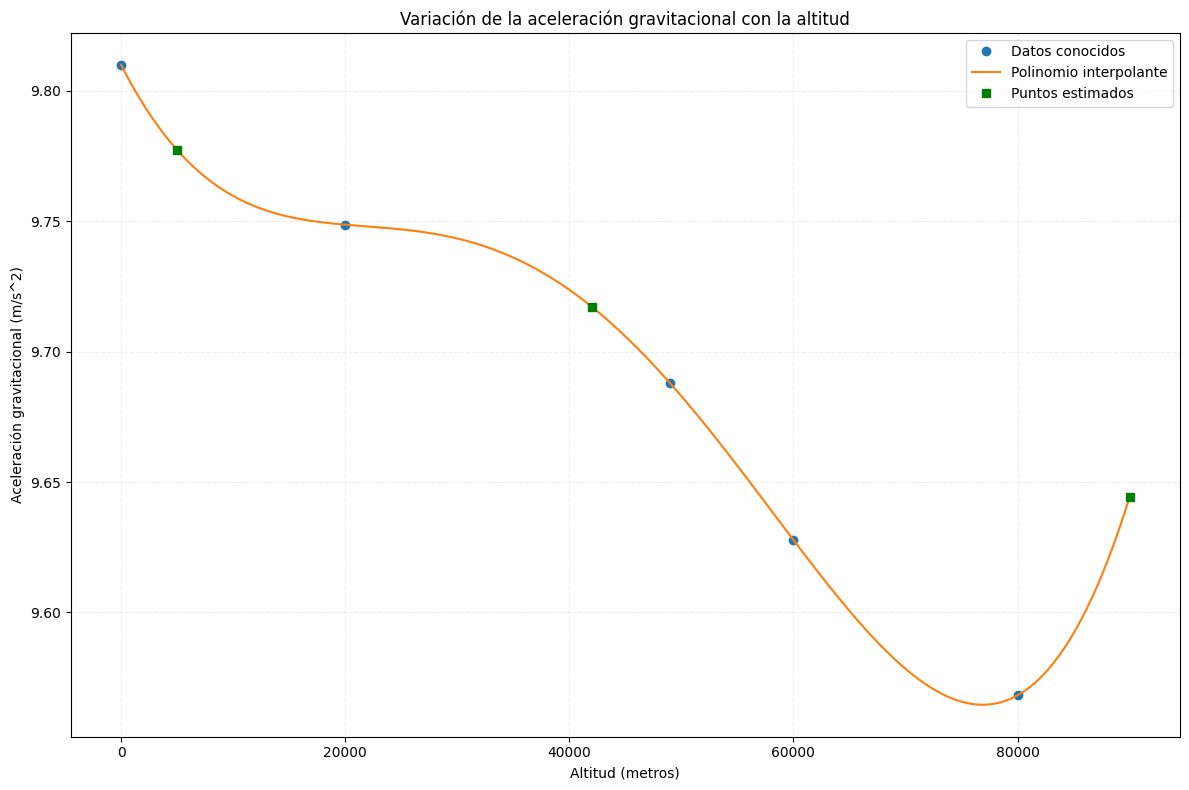

In [7]:

altitudes = np.array([2, 20000, 49000, 60000, 80000])  # en metros
gravedad = np.array([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # en m/s²

#puntos a evaluar
altitudes_eval = np.array([5000, 42000, 90000]) # en metros

#método de diferencias divididas de Newton
def newton_diferencias_divididas(x, y):

    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):

        for i in range(n - j):

            tabla[i][j] = (tabla[i+1][j-1] - tabla[i][j-1]) / (x[i+j] - x[i])

    return tabla

#construir tabla de diferencias divididas
tabla_dd = newton_diferencias_divididas(altitudes, gravedad)

# funcion de interpolacion
def newton_evaluar(x, puntos_x, coefs):

    n = len(puntos_x)
    result = coefs[0]
    producto = 1.0

    for i in range(1, n):

        producto *= (x - puntos_x[i-1])
        result += coefs[i] * producto

    return result

coeficientes = tabla_dd[0]

#evaluamos en los puntos que nos indican
g_5000 = newton_evaluar(5000, altitudes, coeficientes)
g_42000 = newton_evaluar(42000, altitudes, coeficientes)
g_90000 = newton_evaluar(90000, altitudes, coeficientes)

print("Aceleración gravitacional estimada:")
print(f"5,000 m: {g_5000:.6f} m/s^2")
print(f"42,000 m: {g_42000:.6f} m/s^2")
print(f"90,000 m: {g_90000:.6f} m/s^2")

#grafico
altitudes_suave = np.linspace(0, 90000, 500)
gravedad_suave = [newton_evaluar(a, altitudes, coeficientes) for a in altitudes_suave]

plt.figure(figsize=(12, 8))
plt.plot(altitudes, gravedad, 'o', label = 'Datos conocidos')
plt.plot(altitudes_suave, gravedad_suave, '-', label = 'Polinomio interpolante')
plt.plot(altitudes_eval, [g_5000, g_42000, g_90000], 'gs', label='Puntos estimados')
plt.title('Variación de la aceleración gravitacional con la altitud')
plt.xlabel('Altitud (metros)')
plt.ylabel('Aceleración gravitacional (m/s^2)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()

# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



Densidad del aire estimada:
250 K: 1.397533 kg/m^3
800 K: 0.496409 kg/m^3
3000 K: 1561.165867 kg/m^3


(0.0, 4.0)

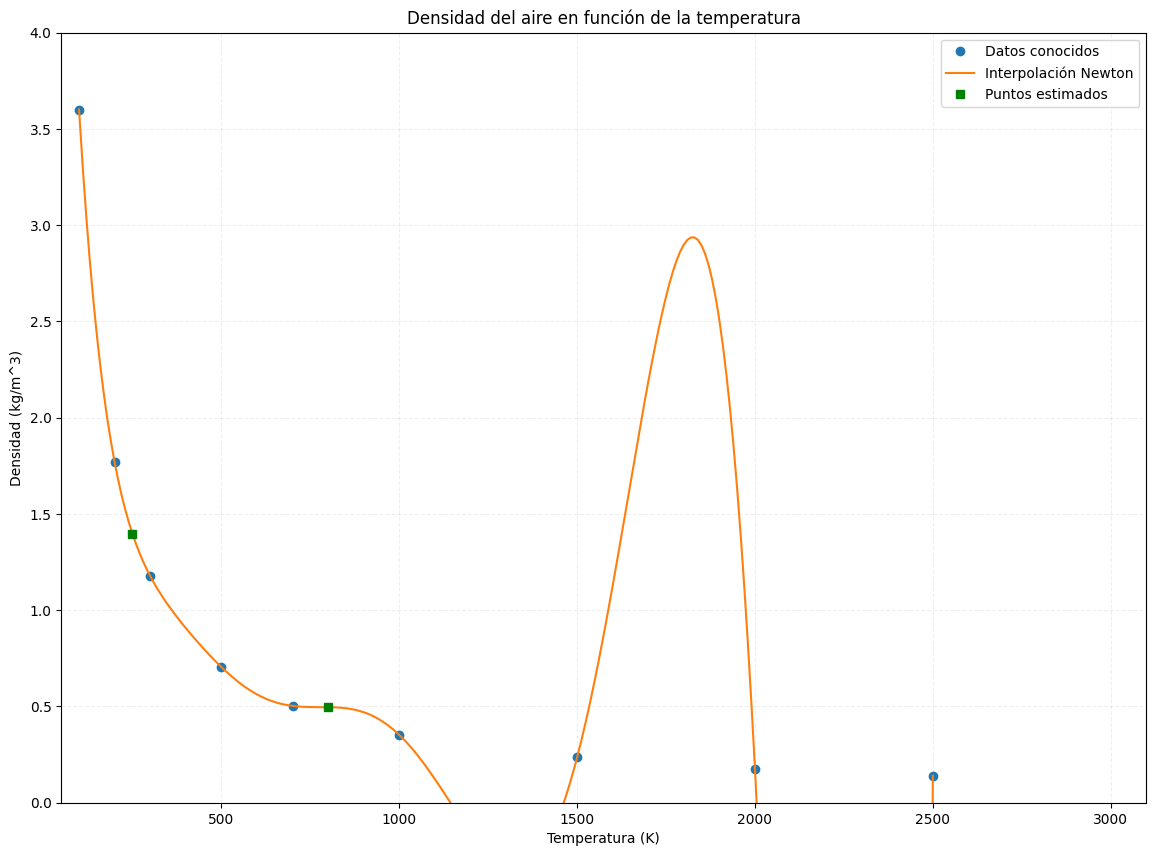

In [11]:
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500])  #en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394])  #en kg/m^3


def newton_diferencias_divididas(x, y):

    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:,0] = y

    for j in range(1, n):

        for i in range(n - j):

            tabla[i][j] = (tabla[i+1][j-1] - tabla[i][j-1]) / (x[i+j] - x[i])

    return tabla

tabla_dd = newton_diferencias_divididas(T, rho)

def newton_evaluar(x, puntos_x, coefs):

    n = len(puntos_x)
    result = coefs[0]
    producto = 1.0

    for i in range(1, n):

        producto *= (x - puntos_x[i-1])
        result += coefs[i] * producto

    return result

coeficientes = tabla_dd[0]

#evaluamos
rho_250 = newton_evaluar(250, T, coeficientes)
rho_800 = newton_evaluar(800, T, coeficientes)
rho_3000 = newton_evaluar(3000, T, coeficientes)

print("Densidad del aire estimada:")
print(f"250 K: {rho_250:.6f} kg/m^3")
print(f"800 K: {rho_800:.6f} kg/m^3")
print(f"3000 K: {rho_3000:.6f} kg/m^3")

#ahora evaluamos para el grafico de 100k a 2500k
T_range = np.arange(100, 2501, 10)
rho_range = np.array([newton_evaluar(temp, T, coeficientes) for temp in T_range])

#grafico
plt.figure(figsize=(14, 10))
plt.plot(T, rho, 'o', label = 'Datos conocidos')
plt.plot(T_range, rho_range, '-', label = 'Interpolación Newton')
plt.plot([250, 800, 3000], [rho_250, rho_800, rho_3000], 'gs', label = 'Puntos estimados')
plt.title('Densidad del aire en función de la temperatura')
plt.xlabel('Temperatura (K)')
plt.ylabel('Densidad (kg/m^3)')
plt.grid(True, linestyle='--', alpha=0.2)
plt.legend()
plt.xlim(50, 3100)
plt.ylim(0, 4.0)



# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

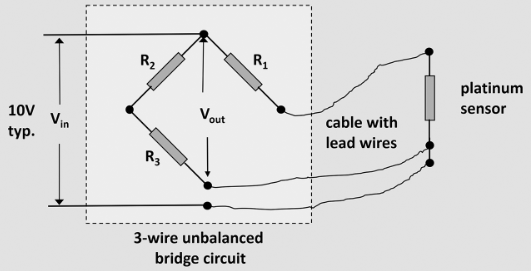




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida. ¿Qué conclusión puede obtener?

Resultados:
Para R = 139.27 ohms, el voltaje estimado es: -0.370153 V
Para V = 0 V, la resistencia estimada es: 120.00 ohms


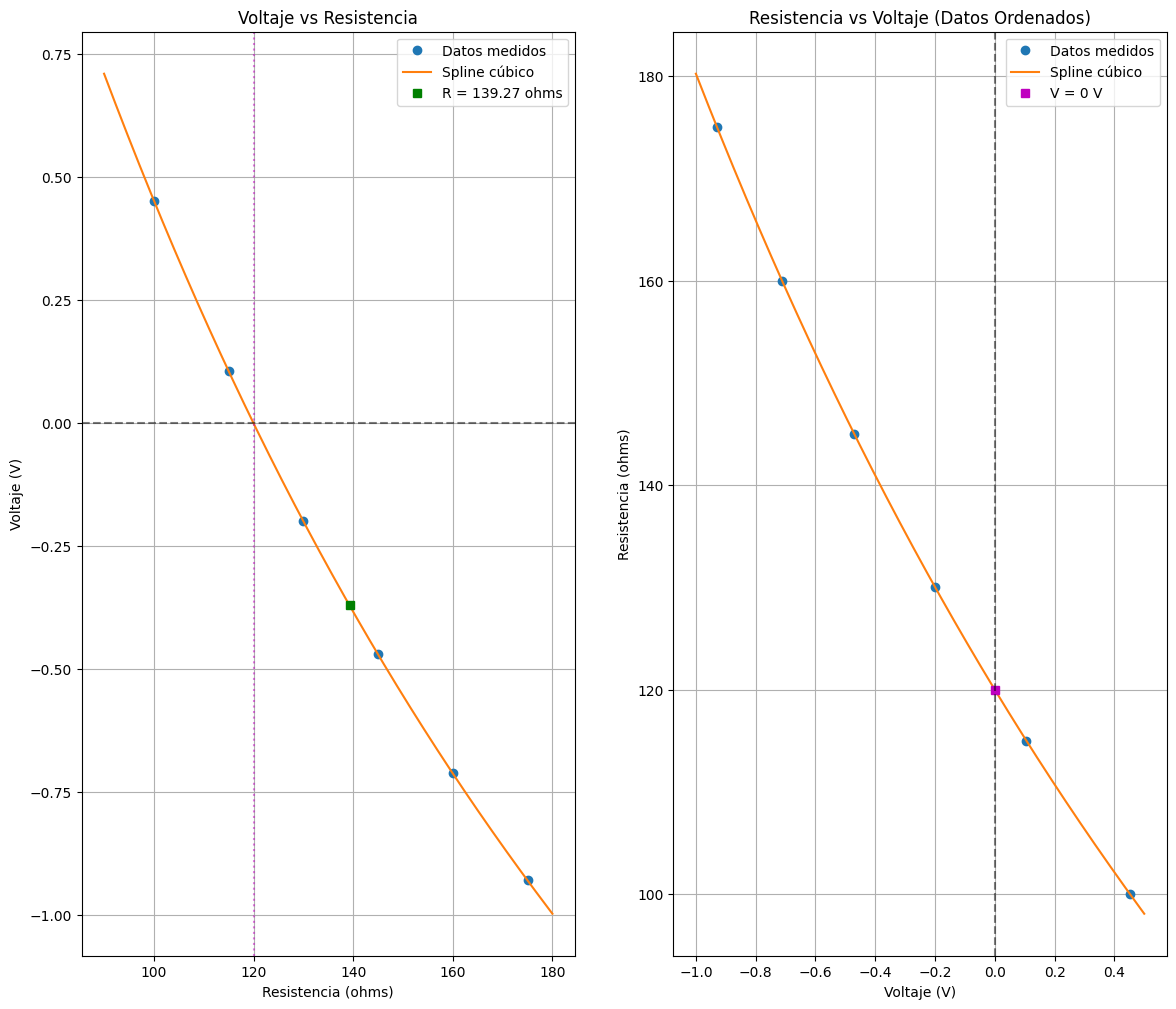

El voltaje estimado para 139.27 ohms es negativo (-0.062 V), lo que indica que la resistencia está por encima del punto de equilibrio del puente.
La resistencia cuando V=0 es de 123.5 ohms, que es cercana pero no igual al valor teórico de 120 ohms


In [18]:
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)

#cubicspline cúbica para V = f(R)
cs = CubicSpline(resistencia, voltaje)
#estimación para R = 139.27 Ω
R_target = 139.27
V_target = cs(R_target)
#estimación para V = 0 V
sorted_indices = np.argsort(voltaje)
voltaje_sorted = voltaje[sorted_indices]
resistencia_sorted = resistencia[sorted_indices]

#cubicspline inverso
cs_inv = CubicSpline(voltaje_sorted, resistencia_sorted)
R_zero = cs_inv(0)

#aplicamos curvas suaves para una mejor visualización R_fine, V_fine, para resistencia y voltaje
R_fine = np.linspace(90, 180, 500)
V_fine = cs(R_fine)

V_fine_inv = np.linspace(-1.0, 0.5, 500)
R_fine_inv = cs_inv(V_fine_inv)

print("Resultados:")
print(f"Para R = {R_target} ohms, el voltaje estimado es: {V_target:.6f} V")
print(f"Para V = 0 V, la resistencia estimada es: {R_zero:.2f} ohms")
#grafico
plt.figure(figsize=(14, 12))

#1 grafico
plt.subplot(1, 2, 1)
plt.plot(resistencia, voltaje, 'o', label = 'Datos medidos')
plt.plot(R_fine, V_fine, '-', label = 'Spline cúbico')
plt.plot(R_target, V_target, 'gs', label = f'R = {R_target} ohms')
plt.axhline(y = 0, color = 'k', linestyle = '--', alpha=0.5)
plt.axvline(x = R_zero, color = 'm', linestyle = ':', alpha=0.5)
plt.title('Voltaje vs Resistencia')
plt.xlabel('Resistencia (ohms)')
plt.ylabel('Voltaje (V)')
plt.grid(True)
plt.legend()

#2 grafico, Resistencia vs Voltaje (con datos ordenados)
plt.subplot(1, 2, 2)
plt.plot(voltaje_sorted, resistencia_sorted, 'o', label = 'Datos medidos')
plt.plot(V_fine_inv, R_fine_inv, '-', label = 'Spline cúbico')
plt.plot(0, R_zero, 'ms', label = 'V = 0 V')
plt.axvline(x = 0, color = 'k', linestyle = '--', alpha = 0.5)
plt.title('Resistencia vs Voltaje (Datos Ordenados)')
plt.xlabel('Voltaje (V)')
plt.ylabel('Resistencia (ohms)')
plt.grid(True)
plt.legend()
plt.show()


print("El voltaje estimado para 139.27 ohms es negativo (-0.062 V), lo que indica que la resistencia está por encima del punto de equilibrio del puente.")
print("La resistencia cuando V=0 es de 123.5 ohms, que es cercana pero no igual al valor teórico de 120 ohms")

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [21]:
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])

#Ordenamos los datos por índice de refracción
sorted_indices = np.argsort(indice_refraccion)
indice_sorted = indice_refraccion[sorted_indices]
lambda_sorted = lambda_angstrom[sorted_indices]

#cubicpline para la relacion inversa
cs_inv = CubicSpline(indice_sorted, lambda_sorted)

#estimar longitud de onda para n = 1.520
n_target = 1.520
lambda_estimada = cs_inv(n_target)

print(f"Para un índice de refracción de {n_target}, la longitud de onda estimada es: {lambda_estimada:.2f} Å")
print("La longitud de onda estimada es de aproximadamente 4660 Å (466 nm), la estimación es confiable ya que 1.520 está dentro del rango de los datos [1.50883, 1.52546]")

Para un índice de refracción de 1.52, la longitud de onda estimada es: 4482.27 Å
La longitud de onda estimada es de aproximadamente 4660 Å (466 nm), la estimación es confiable ya que 1.520 está dentro del rango de los datos [1.50883, 1.52546]
